## import librarries

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## read the dataset

In [8]:
df = pd.read_csv('heart_attack.csv')

--------------

## get information about data

In [9]:
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---------

In [11]:
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1


-----------

### about columns

#### cp : Chest Pain type
#### trtbps : resting blood pressure (in mm Hg)
#### fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#### chol : cholestoral in mg/dl fetched via BMI sensor
#### rest_ecg : resting electrocardiographic results
#### thalachh : maximum heart rate achieved
#### exng : exercise induced angina (1 = yes; 0 = no)
#### oldpeak : Previous peak
#### slp : Slope
#### caa : number of major vessels (0-3)
#### thall : Thal rate
#### output : Target variable


------


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### --> there is no null data

In [14]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


----------

## data cleaning

###  null data

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### --> no null data

-------

### remove duplicated data

In [17]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [18]:
df.drop_duplicates(inplace=True)

#### --> duplicates removed

---------------

## data visualization

-------------
### cp
#### Value 0: typical angina
#### Value 1: atypical angina
#### Value 2: non-anginal pain
#### Value 3: asymptomatic


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Chest Pain type')

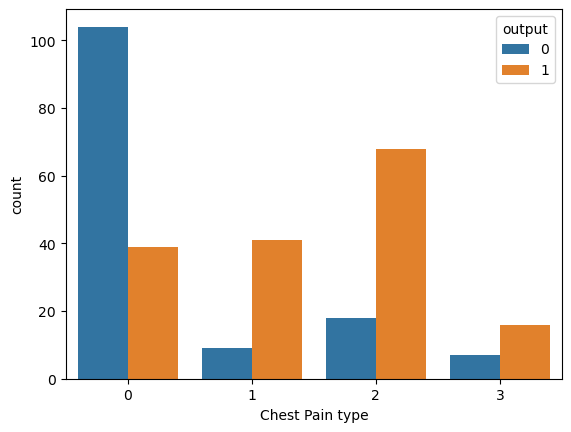

In [32]:
sns.countplot('cp',hue='output',data=df)
plt.xlabel("Chest Pain type")

#### --> peoble who suffer from non-anginal pain have more chance of heart attack

--------------------
### fasting blood sugar

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fbs', ylabel='count'>

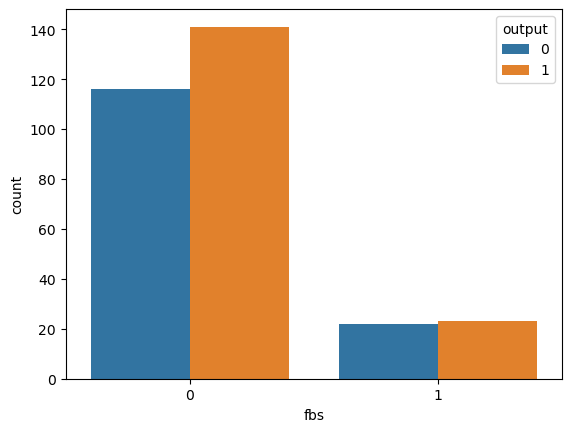

In [33]:
sns.countplot('fbs',hue='output',data=df)

#### -> peoble have less than 120 in fasting blood sugar have more chance of heart attack

------------
### resting electrocardiographic results

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='restecg', ylabel='count'>

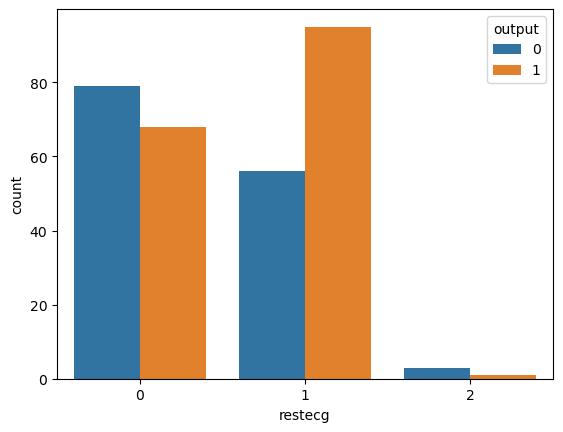

In [34]:
sns.countplot('restecg',hue='output',data=df)

#### --> peoble  having ST-T wave abnormality have more chance of heart attack

----------
### number of major vessels 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='caa', ylabel='count'>

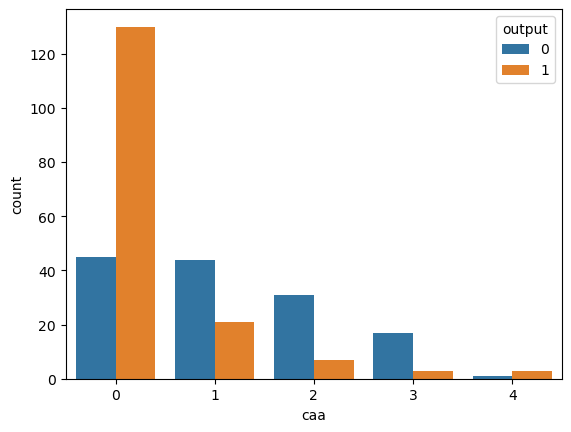

In [35]:
sns.countplot('caa',hue='output',data=df)

#### -> peoble having zero of major vessels  have more chance of heart attack

----------
### exercise induced angina

<AxesSubplot:xlabel='exng', ylabel='count'>

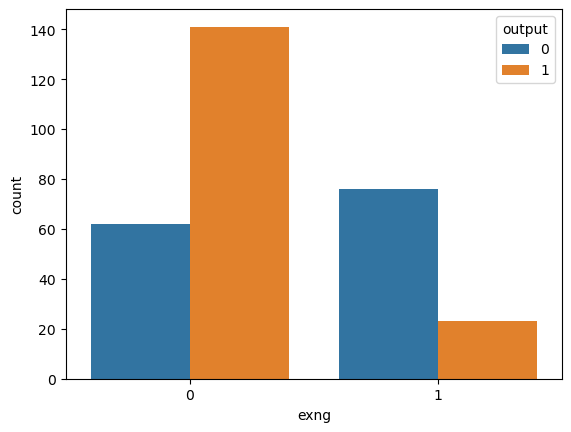

In [37]:
sns.countplot('exng',hue='output',data=df)

#### -> peoble with no exercise induced angina have more chance of heart attack

------
### gendre

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

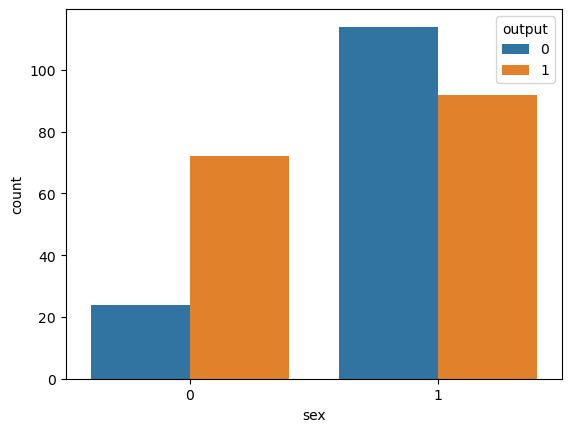

In [44]:
sns.countplot('sex',hue='output',data=df)

#### -> the chance of heart attack is more between men

----------
### age

<AxesSubplot:xlabel='age', ylabel='Density'>

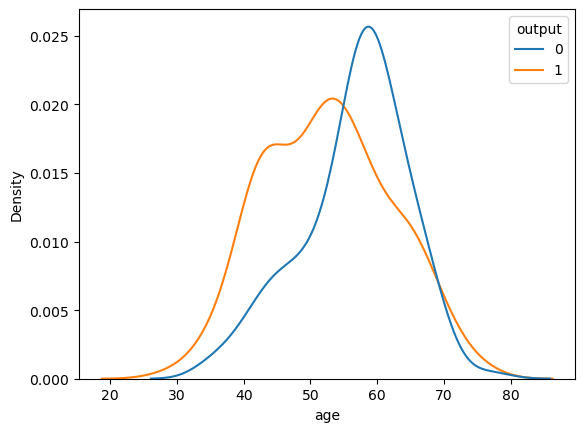

In [47]:
sns.kdeplot('age',hue='output',data=df)

-----
#### -> the chance of heart attack increase from age 30 until age between 50,60

------
### resting blood pressure 

<AxesSubplot:xlabel='trtbps', ylabel='Density'>

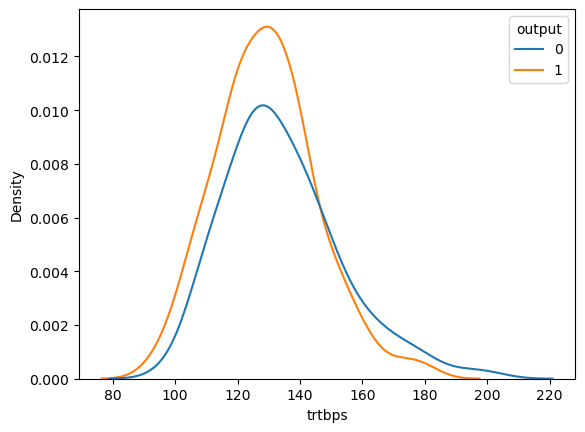

In [48]:
sns.kdeplot('trtbps',hue='output',data=df)

#### -> the chance of heart attack is more when the resting blood pressure approximately between 120-150

---------
### cholestoral in mg/dl fetched via BMI sensor

<AxesSubplot:xlabel='chol', ylabel='Density'>

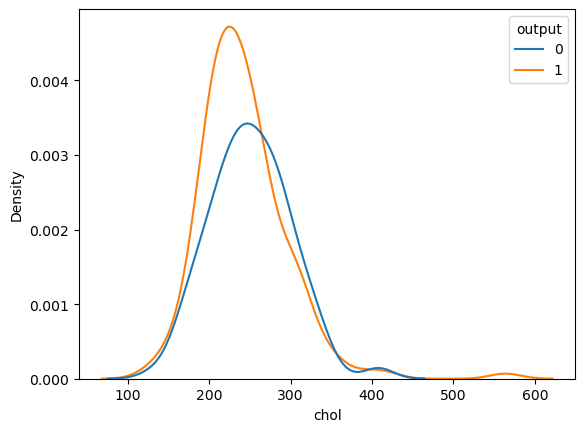

In [49]:
sns.kdeplot('chol',hue='output',data=df)

#### -> the chance of heart attack is more when cholestoral approximately between 190-300

---------
### data correlation

<AxesSubplot:>

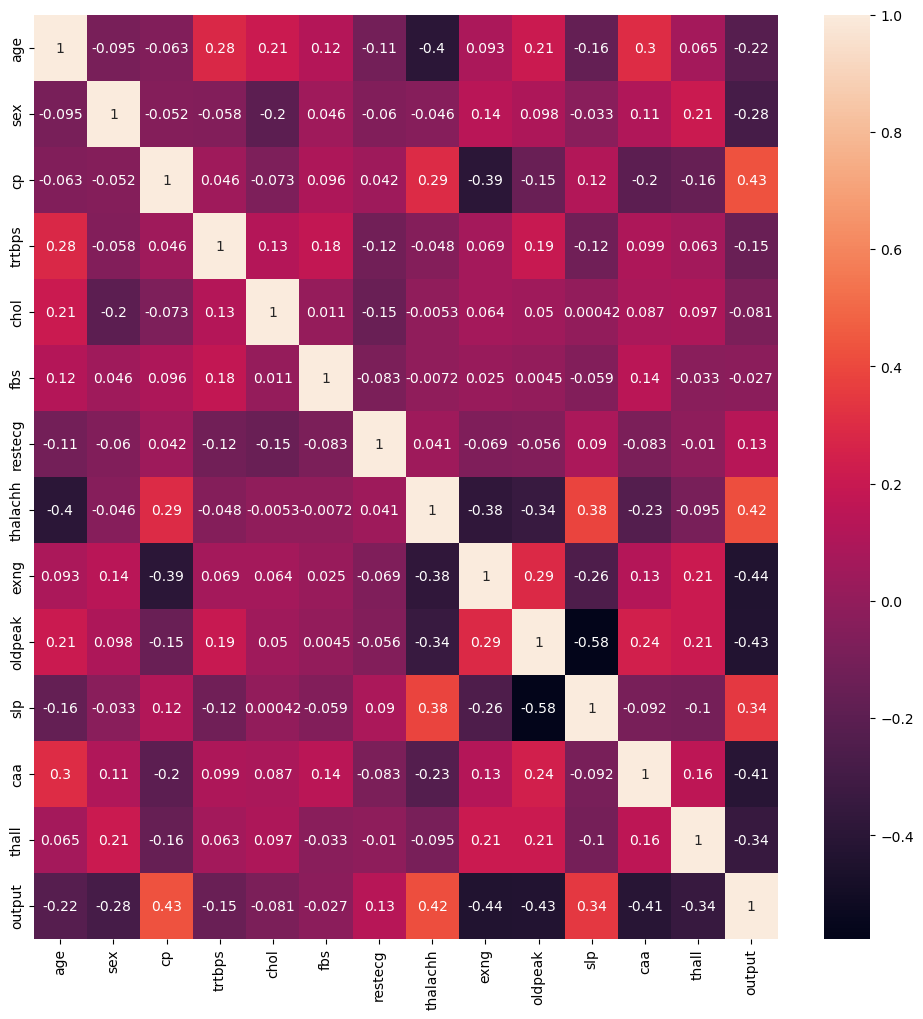

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)